# Лабораторная работа №7
Чуворкин Михаил А-13а-19 Вариант 47

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm.notebook import trange, tqdm

### Задача 7.1. 
Дана задача Коши для системы двух обыкновенных дифференциальных уравнений
$$
\begin{cases}
u' = sin(u) + cos(v) \\
v' = cos(u - v)^2 \\
u(0) = 1, \quad v(0) = 1
\end{cases}
$$


ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ:
1. Модифицировать программу решения задачи по явному методу Эйлера из лабораторной работы 6 для решения системы дифференциальных уравнений. Найти приближенное решение задачи Коши с шагом $h = 0.01$. на отрезке $\left[0,1\right]$. Оценить величину погрешности по правилу Рунге.
2. Модифицировать программу решения задачи по индивидуальному варианту из лабораторной работы 6 для решения системы дифференциальных уравнений. Найти приближенное решение задачи Коши с шагом $h = 0.01$ на отрезке $\left[0,1\right]$. Оценить величину погрешности по правилу Рунге.
3. На одном чертеже построить графики первой компоненты $u(t)$ найденного обоими методами решения, а на другом - графики второй компоненты $v(t)$ найденного обоими методами решения.
4. Сравнить полученные результаты.

In [2]:
def ftuv(t, u, v):
    u_prime = np.sin(u) + np.cos(v)
    v_prime = np.cos( np.power(u - v, 2) )
    return (u_prime, v_prime)

def Euler_with_step(ftuv, t0, tend, u0, v0, h):
    t = np.arange(t0, tend + h/2, h)
    u = np.zeros(len(t))
    v = np.zeros(len(t))
    u[0] = u0
    v[0] = v0
    for i in trange(len(t)-1, desc=f'h={h}'):
        u_i, v_i = ftuv(t[i], u[i], v[i])
        u[i + 1] = u[i] + h * u_i
        v[i + 1] = v[i] + h * v_i
    return u, v

def Adams_with_step(ftuv, t0, tend, u0, v0, h):
    t = np.arange(t0, tend + h/2, h)
    u = np.zeros(len(t))
    v = np.zeros(len(t))
    u[0] = u0
    v[0] = v0
    # первый шаг по методу Эйлера-Коши
    up_05, vp_05 = ftuv(t[0], u[0], v[0])
    ubar = u[0] + h * up_05
    vbar = v[0] + h * vp_05
    u1, v1 = ftuv(t[1], ubar, vbar)
    u[1] = u[0] + (h/2) * (up_05 + u1)
    v[1] = v[0] + (h/2) * (vp_05 + v1)
    
    for i in trange(len(t) - 2, desc=f'h={h}'):
        u_i, v_i = ftuv(t[i], u[i], v[i])
        u_i1, v_i1 = ftuv(t[i+1], u[i+1], v[i+1])
        u[i + 2] = u[i + 1] + (h/2) * (3 * u_i1 - u_i)
        v[i + 2] = v[i + 1] + (h/2) * (3 * v_i1 - v_i)
    return u, v

In [3]:
t0 = 0.0
tend = t0 + 1.0
u0 = 1
v0 = 1
h = 0.01
t = np.arange(t0, tend + h/2, h)

In [4]:
u_res, v_res = Euler_with_step(ftuv, t0, tend, u0, v0, h)
u_res2, v_res2 = Euler_with_step(ftuv, t0, tend, u0, v0, h*2)
u_err = np.max(np.abs(u_res[::2] - u_res2))
v_err = np.max(np.abs(v_res[::2] - v_res2))
print('Оценка погрешности по правилу Рунге для метода Эйлера:')
print(f'u(t) error = {u_err}')
print(f'v(t) error = {v_err}')

h=0.01:   0%|          | 0/100 [00:00<?, ?it/s]

h=0.02:   0%|          | 0/50 [00:00<?, ?it/s]

Оценка погрешности по правилу Рунге для метода Эйлера:
u(t) error = 0.004074616396643638
v(t) error = 4.677077160009091e-06


In [5]:
u_adams, v_adams = Adams_with_step(ftuv, t0, tend, u0, v0, h)
u_adams2, v_adams2 = Adams_with_step(ftuv, t0, tend, u0, v0, h*2)
u_err = np.max(np.abs( u_adams[::2] - u_adams2) / 3 )
v_err = np.max(np.abs( v_adams[::2] - v_adams2) / 3 )
print('Оценка погрешности по правилу Рунге для метода Адамса:')
print(f'u(t) error = {u_err}')
print(f'v(t) error = {v_err}')

h=0.01:   0%|          | 0/99 [00:00<?, ?it/s]

h=0.02:   0%|          | 0/49 [00:00<?, ?it/s]

Оценка погрешности по правилу Рунге для метода Адамса:
u(t) error = 4.4625107632478844e-05
v(t) error = 1.085283308407033e-07


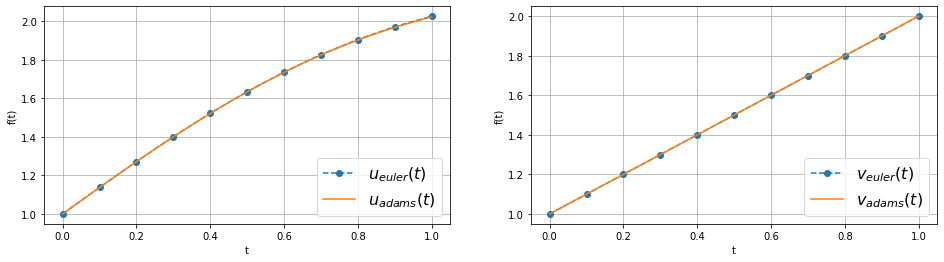

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (16, 4))
axs[0].plot(t[::10], u_res[::10], 'o--',label='$u_{euler}(t)$')
axs[0].plot(t, u_adams, label='$u_{adams}(t)$')
axs[0].set_xlabel('t')
axs[0].set_ylabel('f(t)')
axs[0].grid()
axs[0].legend(loc='lower right', fontsize=16)
axs[1].plot(t[::10], v_res[::10], 'o--', label='$v_{euler}(t)$')
axs[1].plot(t, v_adams, label='$v_{adams}(t)$')
axs[1].set_xlabel('t')
axs[1].set_ylabel('f(t)')
axs[1].grid()
axs[1].legend(loc='lower right', fontsize=16)
plt.show()

По графикам видно, что решения, полученные методом Эйлера и экстраполяционным методом Адамса 2 порядка точности близки.

### Задача 7.2. 
Дана задача Коши для двух систем обыкновенных дифференциальных уравнений с постоянными коэффициентами
$$
Y'(t) = AY(t), \quad Y(0) = Y_0
$$
$$
Z'(t) = BZ(t), \quad Z(0) = Z_0
$$
где $A$ и $B$ – заданные матрицы, $Y_0$ , $Z_0$ - заданные векторы.

Исследовать поведение решения систем уравнений.

ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ:
1. Используя встроенную функцию пакета $NUMPY$ для нахождения собственных чисел матриц $A$ и $B$, найти коэффициенты жесткости обеих систем. Установить какая задача является жесткой.
2. Численно решить обе задачи на отрезке $\left[0,1\right]$ c шагом $h = 0.01$ явным методом Эйлера. Определить, для какой из задач явный метод неустойчив при данном шаге $h$. Построить графики компонент полученного решения.
3. Численно решить обе задачи на отрезке $\left[0,1\right]$ c шагом $h = 0.01$ по индивидуальному варианту из лабораторной работы 6. Определить, для какой из задач метод неустойчив при данном шаге h. $h = 0.01$. Построить графики компонент полученного решения.
4. Для жесткой задачи экспериментально подобрать шаг $h$, при котором графики компонент решения, полученного по явному методу Эйлера, визуально совпадают с графиками компонент решения, полученного по неявному методу с шагом $h=0.01$. Сравнить найденное значение шага с теоретическим значением шага, при котором явный метод Эйлера для жестких задач должен быть устойчивым.
5. Сравнить полученные результаты.

In [7]:
def Euler_matrix(A, t0, tend, Y0, h):
    steps = int((tend - t0) / h) + 1
    Y = np.zeros((steps, A.shape[1]))
    Y[0] = Y0
    for i in trange(steps-1, desc=f'h={h}'):
        Y[i + 1] = Y[i] + h * (A @ Y[i])
    return Y

def Euler_matrix_implicit(A, t0, tend, Y0, h):
    steps = int((tend - t0) / h) + 1
    Y = np.zeros((steps, A.shape[1]))
    Y[0] = Y0
    E = np.eye(A.shape[1])
    for i in trange(steps-1, desc=f'h={h}'):
        Y[i + 1] = np.linalg.inv(E - h * A) @ Y[i]
    return Y
    

def Adams_matrix(A, t0, tend, Y0, h):
    steps = int((tend - t0) / h) + 1
    Y = np.zeros((steps, A.shape[1]))
    Y[0] = Y0
    # первый шаг по модифицированному методу Эйлера
    Y[1] = Y[0] + h * (A @ (Y[0] + (h/2) * (A @ Y[0])))
    for i in trange(steps-2, desc=f'h={h}'):
        Y[i+2] = Y[i+1] + (h / 2) * (3 * (A @ Y[i+1]) - (A @ Y[i]))
    return Y
    
def methodPlots(Y, Z, t, y_label, z_label):
    ylim = min(np.max(Y), np.max(Z))
    fig, axs = plt.subplots(nrows=Y.shape[1], ncols=2, figsize = (15, 10))
    for i in range(axs.shape[0]):
        axs[i][0].set_ylim(-ylim, ylim)
        axs[i][0].plot(t, Y[:, i], label=f'{y_label}{i}')
        axs[i][0].set_xlabel('t')
        axs[i][0].set_ylabel(f'Y{i}(t)')
        axs[i][0].grid()
        axs[i][0].legend(loc='lower right')

        axs[i][1].set_ylim(-ylim, ylim)
        axs[i][1].plot(t, Z[:, i], label=f'{z_label}{i}')
        axs[i][1].set_xlabel('t')
        axs[i][1].set_ylabel(f'Z{i}(t)')
        axs[i][1].grid()
        axs[i][1].legend(loc='lower right')
    plt.show()
    
def comparePlots(Yex, Yim, tex, tim, sys_label):
    ylim = min(np.max(Yex), np.max(Yim))
    fig, axs = plt.subplots(nrows=1, ncols=Yex.shape[1], figsize = (20, 5))
    for i in range(axs.shape[0]):
        axs[i].set_ylim(-ylim, ylim)
        axs[i].plot(tex, Yex[:, i], label=f'{sys_label}{i}')
        axs[i].plot(tim, Yim[:, i], label=f'{sys_label}{i}(implicit)')
        axs[i].set_xlabel('t')
        axs[i].set_ylabel(f'{sys_label}{i}(t)')
        axs[i].grid()
        axs[i].legend(loc='lower right')
    plt.show()

In [8]:
A = np.array([[-316.92, -29.345, -14.984],
              [-31.737, -14.049, 119.095],
              [8.856, -119.706, -11.031]])

B = np.array([[-226.864, 12.177, -22.118],
              [-24.231, -224.371, 12.336],
              [6.49, -24.312, -216.765]])


Y_0 = np.array([3.2, 3.6, 4])
Y_1 = np.array([2.8, 4, 3.6])

In [9]:
wA, _ = np.linalg.eig(A)
wB, _ = np.linalg.eig(B)

print('Собственные числа матриц:')
print(f'wA = {wA.real}')
print(f'wB = {wB.real}')

Собственные числа матриц:
wA = [-319.99969575  -11.00015212  -11.00015212]
wB = [-216.02957932 -216.02957932 -235.94084137]


Вещественная часть собственных чисел орицательна, решения задач асимптотически устойчиво

In [10]:
sA = np.max(np.abs(wA.real)) / np.min(np.abs(wA.real))
sB = np.max(np.abs(wB.real)) / np.min(np.abs(wB.real))

print('Числа жесткости матриц:')
print(f's(A) = {sA}')
print(f's(B) = {sB}')

Числа жесткости матриц:
s(A) = 29.090479129300476
s(B) = 1.092169146999507


In [11]:
t0 = 0.0
tend = t0 + 1.0
h = 0.01
t = np.linspace(t0, tend + h, int((tend - t0) / h) + 1)

Система с матрицей А является жесткой, с матрицей B - нет

#### Метод Эйлера

In [12]:
Y = Euler_matrix(A, t0, tend, Y_0, h)
Z = Euler_matrix(B, t0, tend, Y_1, h)

h=0.01:   0%|          | 0/100 [00:00<?, ?it/s]

h=0.01:   0%|          | 0/100 [00:00<?, ?it/s]

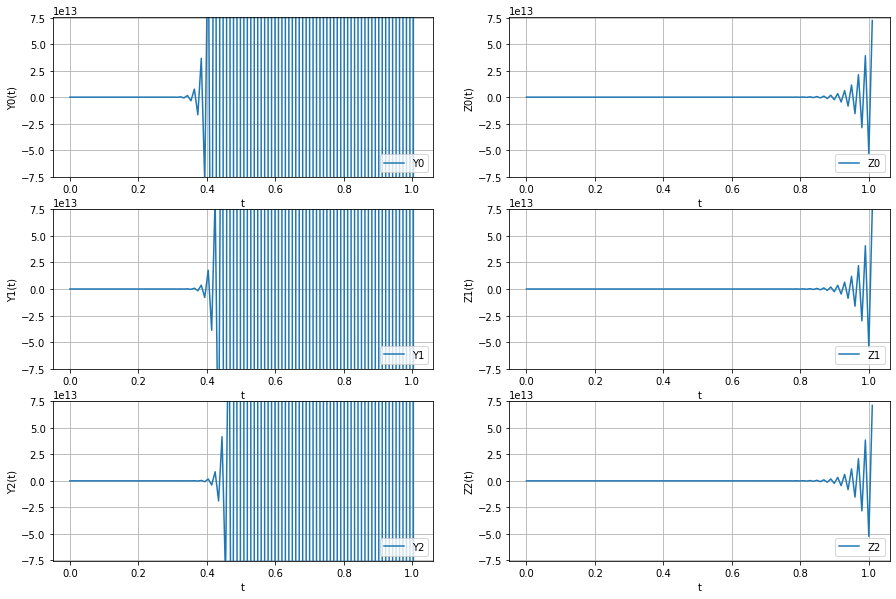

In [13]:
methodPlots(Y, Z, t, 'Y', 'Z')

По графикам видно, что метод Эйлера является неустойчивым и для первой, и для второй системы

#### Экстраполяционный метод Адамса

In [14]:
YA = Adams_matrix(A, t0, tend, Y_0, h)
ZA = Adams_matrix(B, t0, tend, Y_1, h)

h=0.01:   0%|          | 0/99 [00:00<?, ?it/s]

h=0.01:   0%|          | 0/99 [00:00<?, ?it/s]

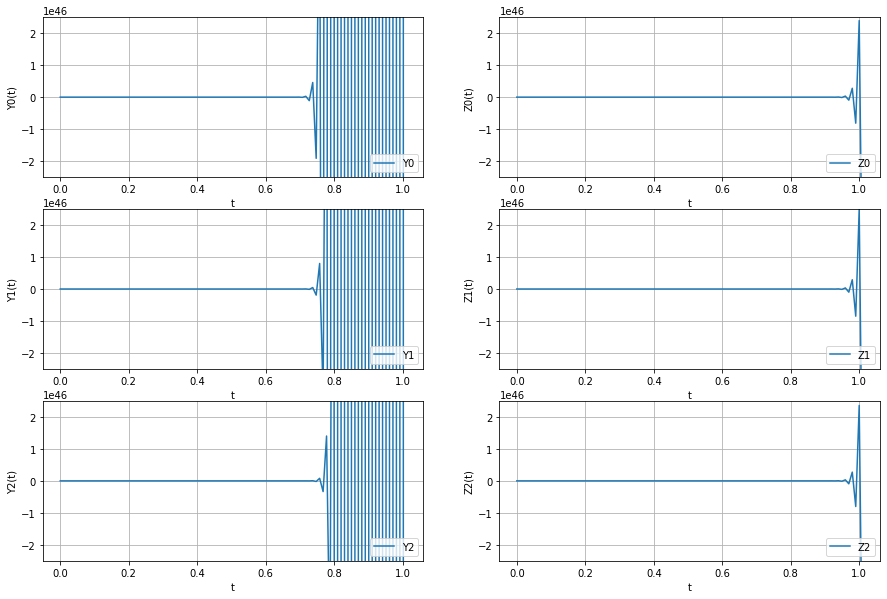

In [15]:
methodPlots(YA, ZA, t, 'Y', 'Z')

Аналогично, экстраполяционный метод Адамса является неустойчивым для обеих систем, но раскачивание начинается позже

#### Неявный метод Эйлера

In [16]:
h_impl = 0.01
t_impl = np.linspace(t0, tend + h, int((tend - t0) / h_impl) + 1)
YE_impl = Euler_matrix_implicit(A, t0, tend, Y_0, h_impl)
ZE_impl = Euler_matrix_implicit(B, t0, tend, Y_1, h_impl)

h=0.01:   0%|          | 0/100 [00:00<?, ?it/s]

h=0.01:   0%|          | 0/100 [00:00<?, ?it/s]

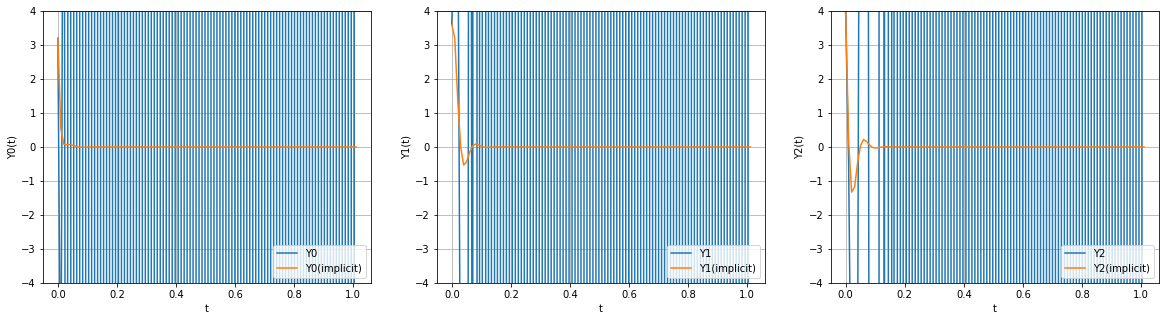

In [17]:
comparePlots(Y, YE_impl, t, t_impl, 'Y')

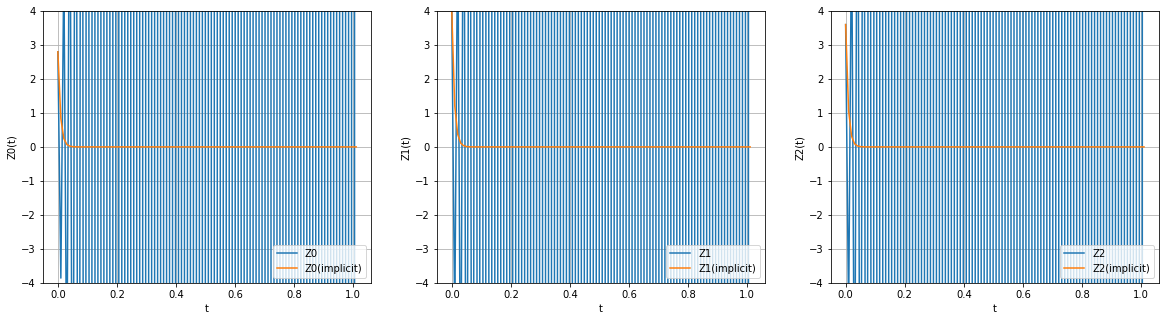

In [18]:
comparePlots(Z, ZE_impl, t, t_impl, 'Z')

Заметим, неявный метод является устойчивым на шаге 0.01
Подберем значение шага, при котором явный метод будет устойчив

h=0.001:   0%|          | 0/1000 [00:00<?, ?it/s]

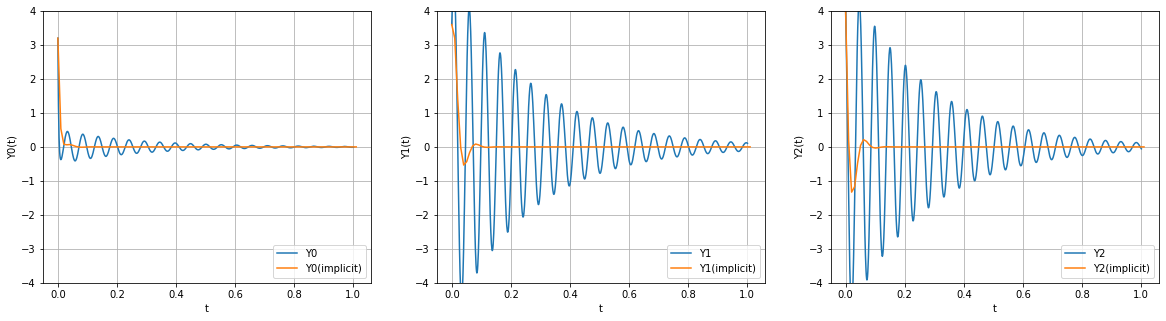

h=0.0001:   0%|          | 0/10000 [00:00<?, ?it/s]

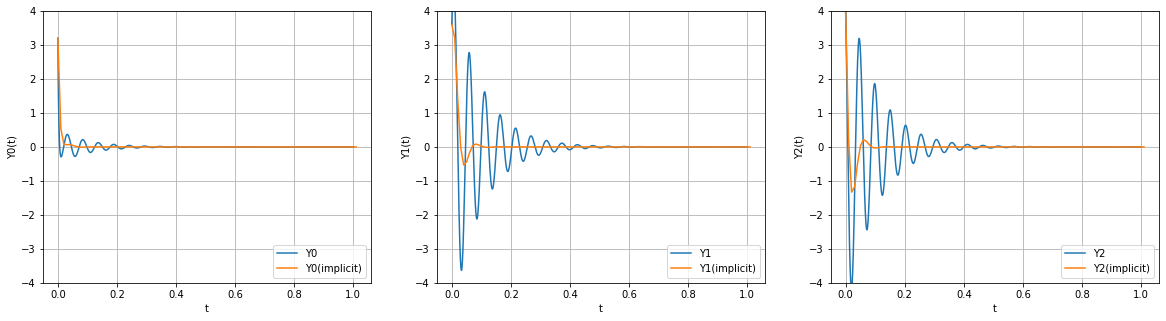

h=1e-05:   0%|          | 0/99999 [00:00<?, ?it/s]

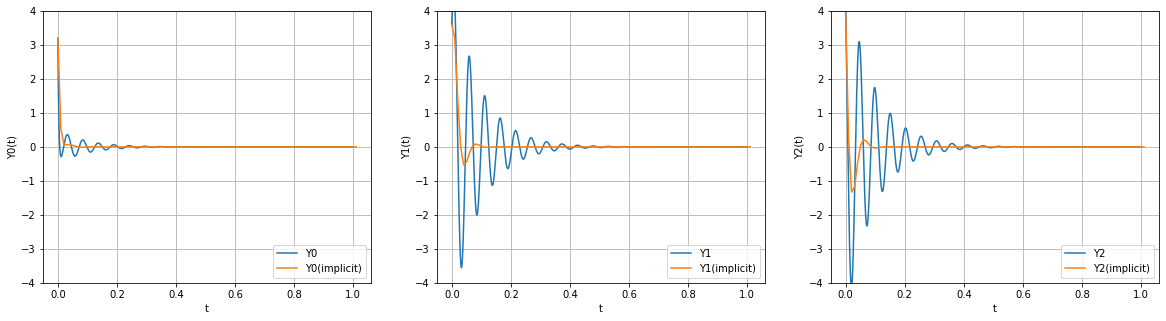

In [19]:
for h in (0.001, 0.0001, 0.00001):
    t = np.linspace(t0, tend + h, int((tend - t0) / h) + 1)
    Y = Euler_matrix(A, t0, tend, Y_0, h)
    comparePlots(Y, YE_impl, t, t_impl, 'Y')

Заметим, что графики решений явным методом изменились (раскачивание прекратилось) и стали похожи при $h = 10^{-4}$ и $h = 10^{-5}$, уменьшим шаг для неявного метода (так как по графикам явного метода заметно, что колебания на начале отрезка имеют период, меньший значения шага) и добьемся совпадения графиков.

h=0.0001:   0%|          | 0/10000 [00:00<?, ?it/s]

h=0.01:   0%|          | 0/100 [00:00<?, ?it/s]

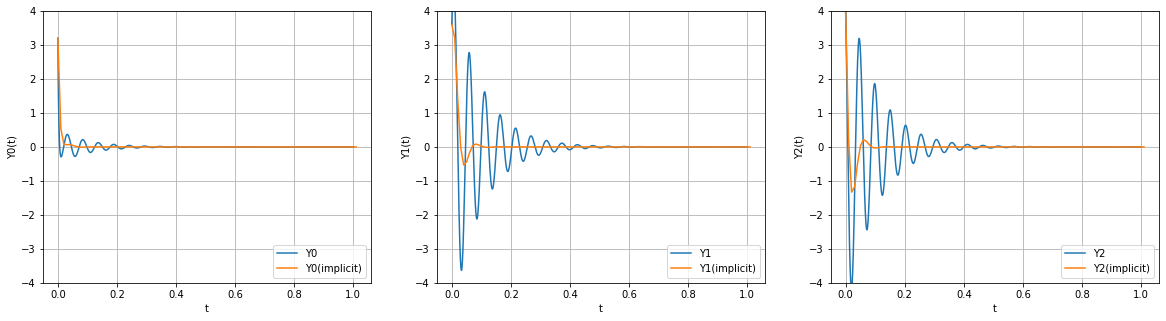

h=0.001:   0%|          | 0/1000 [00:00<?, ?it/s]

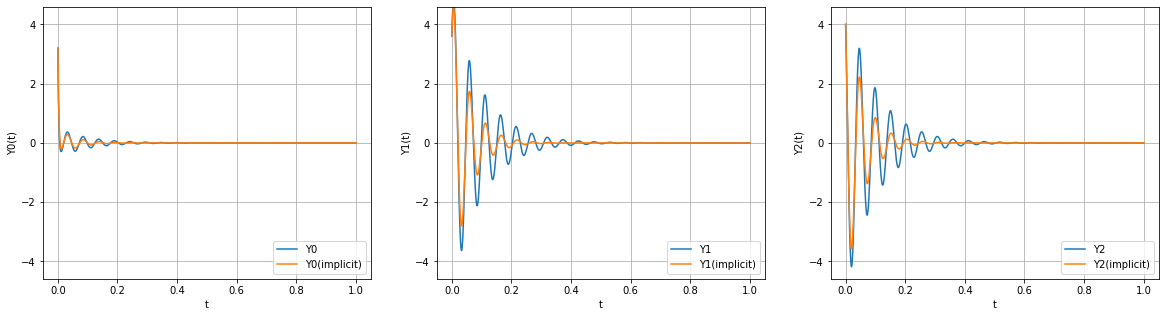

h=0.0001:   0%|          | 0/10000 [00:00<?, ?it/s]

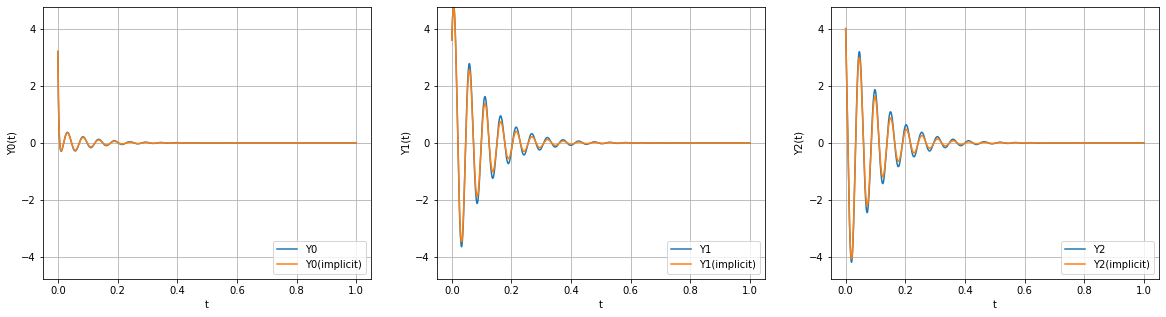

In [62]:
h = 0.0001
t = np.linspace(t0, tend + h, int((tend - t0) / h) + 1)
Y = Euler_matrix(A, t0, tend, Y_0, h)
for h_impl in (0.01, 0.001, 0.0001):
    t_impl = np.linspace(t0, tend + h_impl, int((tend - t0) / h_impl) + 1)
    YE_impl = Euler_matrix_implicit(A, t0, tend, Y_0, h_impl)
    comparePlots(Y, YE_impl, t, t_impl, 'Y')

Удалось добиться совпадения решений (приблизительно) при шаге $h = 10^{-4}$ для обоих методов

In [52]:
ht = 2 / np.max(np.abs(wA.real))
print(f'Теор. оценка шага: h <= {ht}')

Теор. оценка шага: h <= 0.006250005942311261


Однако, решение при использовании явного метода стабилизируется при значении шага $\approx 0.001$:

h=0.001:   0%|          | 0/1000 [00:00<?, ?it/s]

h=0.002:   0%|          | 0/500 [00:00<?, ?it/s]

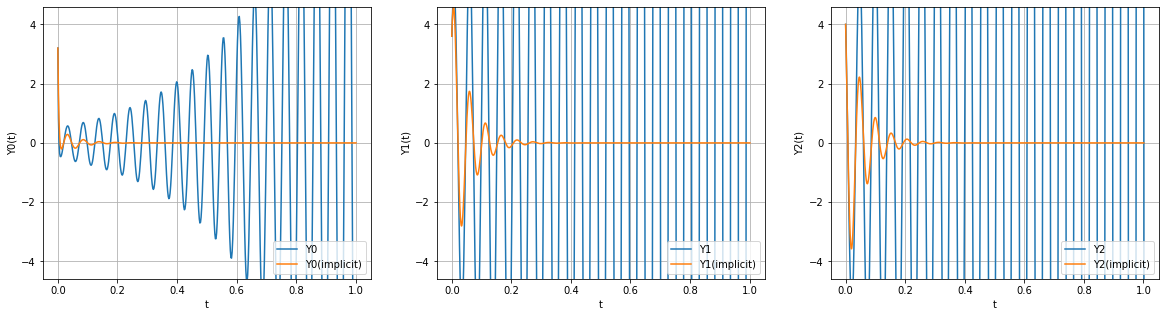

h=0.0015:   0%|          | 0/666 [00:00<?, ?it/s]

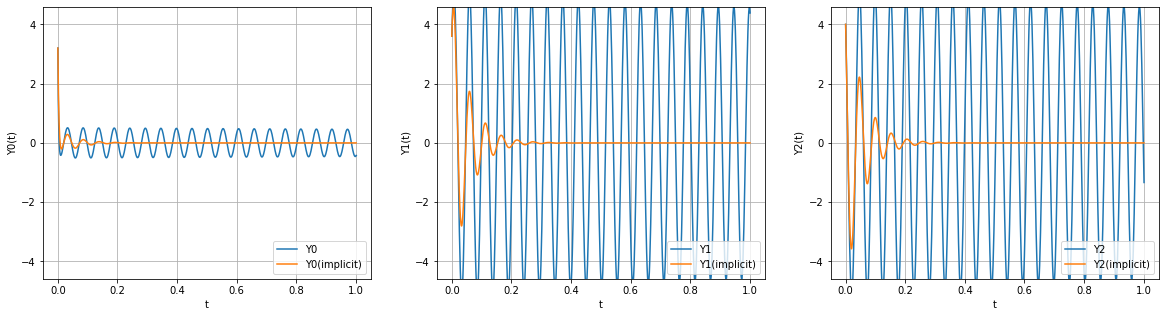

h=0.001:   0%|          | 0/1000 [00:00<?, ?it/s]

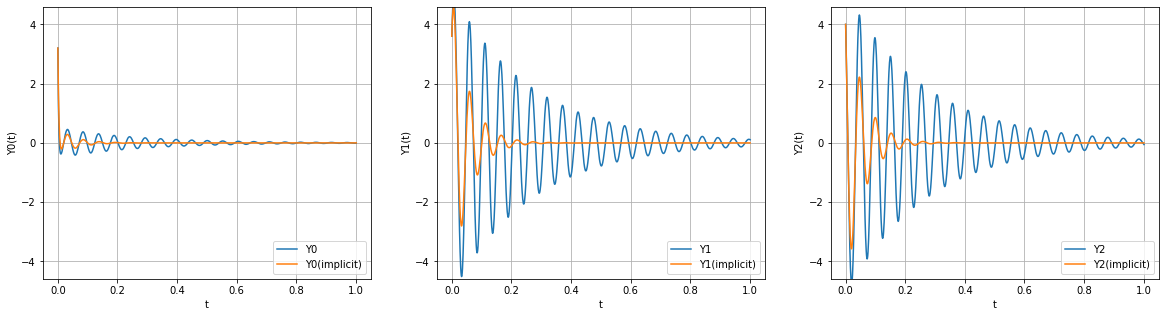

In [61]:
h_impl = 0.001
t_impl = np.linspace(t0, tend + h_impl, int((tend - t0) / h_impl) + 1)
YE_impl = Euler_matrix_implicit(A, t0, tend, Y_0, h_impl)
for h in (0.002, 0.0015, 0.001):
    tS = np.linspace(t0, tend + h, int((tend - t0) / h) + 1)
    YS = Euler_matrix(A, t0, tend, Y_0, h)
    comparePlots(YS, YE_impl, tS, t_impl, 'Y')